[![lite-badge](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://jupyter.org/try-jupyter)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zyang91/spatial_analysis/blob/main/first_class.ipynb#scrollTo=4c43e7f5)

In [1]:
import pandas as pd


In [3]:
city_names = pd.Series (["San Francisco", "San Jose", "Binghamton"])

In [5]:
population = pd.Series([850000,1010085,487900])

In [6]:
city_names

0    San Francisco
1         San Jose
2       Binghamton
dtype: object

In [8]:
cities_df= pd.DataFrame({"City Name":city_names, "population":population})

In [9]:
cities_df

,City Name,population
0,San Francisco,850000
1,San Jose,1010085
2,Binghamton,487900


In [11]:
cities_df["City Name"]

0    San Francisco
1         San Jose
2       Binghamton
Name: City Name, dtype: object

In [12]:
cities_df["population"]

0     850000
1    1010085
2     487900
Name: population, dtype: int64

In [15]:
cities_list=["San Francisco","San Jose","Binghamton"]


In [16]:
cities_list[:2]

['San Francisco', 'San Jose']

In [17]:
cities_df

,City Name,population
0,San Francisco,850000
1,San Jose,1010085
2,Binghamton,487900


In [18]:
cities_df[:2]

,City Name,population
0,San Francisco,850000
1,San Jose,1010085


In [19]:
cities_df[:1]

,City Name,population
0,San Francisco,850000


In [20]:
cities_df["population"].median()

850000.0

In [28]:
city= pd.Series(["Binghamton", "Vestal", "JC"])

In [29]:
population=pd.Series([50000,45000,30000])

In [30]:
city

0    Binghamton
1        Vestal
2            JC
dtype: object

In [31]:
city_df=pd.DataFrame({"city name":city, "population":population})

In [32]:
city_df

,city name,population
0,Binghamton,50000
1,Vestal,45000
2,JC,30000


In [33]:
city_df["population"].median()

45000.0

In [34]:
import numpy as np

In [35]:
np.median(city_df["population"])

45000.0

In [36]:
def get_large_city(population):
    return population>=40000

In [38]:
large_city_sel= city_df["population"].apply(get_large_city)

In [39]:
large_city_sel

0     True
1     True
2    False
Name: population, dtype: bool

In [41]:
city_df["large city"]=large_city_sel

In [42]:
small_city=lambda population:population<40000

In [46]:
city_df["small city"]= city_df["population"].apply(small_city)

In [47]:
city_df

,city name,population,large city,small city
0,Binghamton,50000,True,False
1,Vestal,45000,True,False
2,JC,30000,False,True


In [48]:
city_df["large city"]

0     True
1     True
2    False
Name: large city, dtype: bool

In [49]:
city_df.loc[city_df["large city"]]

,city name,population,large city,small city
0,Binghamton,50000,True,False
1,Vestal,45000,True,False


In [50]:
city_df["population"]>45000

0     True
1    False
2    False
Name: population, dtype: bool

In [51]:
city_df.loc[city_df["population"]<45000]

,city name,population,large city,small city
2,JC,30000,False,True


In [52]:
city_df.loc[~large_city_sel]

,city name,population,large city,small city
2,JC,30000,False,True


In [53]:
city_df.query("population<45000")

,city name,population,large city,small city
2,JC,30000,False,True


In [55]:
census_df=pd.read_csv("C:\data\census\ACS_19_1YR_B25003.csv")

In [56]:
census_df.head(n=5)

,GEO.id,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03
0,1600000US0103076,"Auburn city, Alabama",26156,2687,13095,1829,13061,2108
1,1600000US0107000,"Birmingham city, Alabama",93300,3618,37788,2635,55512,2788
2,1600000US0121184,"Dothan city, Alabama",27103,1044,15891,824,11212,817
3,1600000US0135896,"Hoover city, Alabama",32461,1606,22391,1515,10070,1496
4,1600000US0137000,"Huntsville city, Alabama",88930,2823,48728,2758,40202,2550


In [57]:
columns=["GEO.display-label","HD01_VD01","HD01_VD03"]
census_df=census_df[columns]

In [58]:
census_df.head()

,GEO.display-label,HD01_VD01,HD01_VD03
0,"Auburn city, Alabama",26156,13061
1,"Birmingham city, Alabama",93300,55512
2,"Dothan city, Alabama",27103,11212
3,"Hoover city, Alabama",32461,10070
4,"Huntsville city, Alabama",88930,40202


In [60]:
census_df.columns=["City","Total","Rentals"]

In [61]:
census_df.head(n=5)

,City,Total,Rentals
0,"Auburn city, Alabama",26156,13061
1,"Birmingham city, Alabama",93300,55512
2,"Dothan city, Alabama",27103,11212
3,"Hoover city, Alabama",32461,10070
4,"Huntsville city, Alabama",88930,40202


In [62]:
census_df['Rental Rate']= census_df['Rentals']/census_df['Total']*100

In [63]:
census_df.head()

,City,Total,Rentals,Rental Rate
0,"Auburn city, Alabama",26156,13061,49.935005
1,"Birmingham city, Alabama",93300,55512,59.498392
2,"Dothan city, Alabama",27103,11212,41.368114
3,"Hoover city, Alabama",32461,10070,31.021842
4,"Huntsville city, Alabama",88930,40202,45.206342


In [64]:
len(census_df)

634

In [65]:
top_cities_list = [
    "Philadelphia city, Pennsylvania",
    "New York city, New York",
    "Los Angeles city, California",
    "Houston city, Texas",
    "Chicago city, Illinois",
    "Phoenix city, Arizona",
]

In [66]:
census_df["City"].isin(top_cities_list)

0      False
1      False
2      False
3      False
4      False
       ...  
629    False
630    False
631    False
632    False
633    False
Name: City, Length: 634, dtype: bool

In [67]:
census_df.loc[census_df["City"].isin(top_cities_list)]

,City,Total,Rentals,Rental Rate
19,"Phoenix city, Arizona",586878,267225,45.533314
94,"Los Angeles city, California",1398900,887785,63.463078
284,"Chicago city, Illinois",1080345,603352,55.848086
439,"New York city, New York",3211033,2188214,68.146730
487,"Philadelphia city, Pennsylvania",619505,295783,47.745055
538,"Houston city, Texas",876504,522942,59.662249


In [68]:
census_df.query("City in @top_cities_list")

,City,Total,Rentals,Rental Rate
19,"Phoenix city, Arizona",586878,267225,45.533314
94,"Los Angeles city, California",1398900,887785,63.463078
284,"Chicago city, Illinois",1080345,603352,55.848086
439,"New York city, New York",3211033,2188214,68.146730
487,"Philadelphia city, Pennsylvania",619505,295783,47.745055
538,"Houston city, Texas",876504,522942,59.662249


In [69]:
year_str="19"

In [70]:
path=f"C:\data\census\ACS_{year_str}_1YR_B25003.csv"

In [71]:
print(path)

C:\data\census\ACS_19_1YR_B25003.csv


In [72]:
all_rental_data=[]
start_year=2005
stop_year=2019
for year in range(start_year, stop_year+ 1):
    print(f"loading data for year= {year}...")

loading data for year= 2005...
loading data for year= 2006...
loading data for year= 2007...
loading data for year= 2008...
loading data for year= 2009...
loading data for year= 2010...
loading data for year= 2011...
loading data for year= 2012...
loading data for year= 2013...
loading data for year= 2014...
loading data for year= 2015...
loading data for year= 2016...
loading data for year= 2017...
loading data for year= 2018...
loading data for year= 2019...


In [74]:
all_rental_data = []
start_year = 2005
stop_year = 2019
for year in range(start_year, stop_year + 1):
    
    #---------------------------------------------
    # Step 0: Print out year 
    # The variable year changes for each iteration of the loop
    #----------------------------------------------
    print(f"Loading data for year = {year}...")
    
    #---------------------------------
    # Step 1: Read data for this year
    #---------------------------------
    year_str = str(year) # convert integer value of "year" to a string
    year_str = year_str[2:] # extract the last two digits of the year string
    rental_df = pd.read_csv(f"C:\data\census\ACS_{year_str}_1YR_B25003.csv")
     
    #---------------------------------
    # Step 2: Columns we want
    #---------------------------------
    columns = ['GEO.display-label', 'HD01_VD01', 'HD01_VD03']
    rental_df = rental_df[columns]

    #---------------------------------
    # Step 3: Rename columns
    #---------------------------------
    rental_df.columns = ['City', 'Total', 'Rentals']
    
    #----------------------------------
    # Step 4: Calculate the rental rate
    #----------------------------------
    rental_df['Rental Rate'] = rental_df['Rentals'] / rental_df['Total'] * 100
    
    #----------------------------------
    # Step 5: Select the cities we want
    #----------------------------------
    selection = rental_df['City'].isin(top_cities_list)
    top_cities_df = rental_df.loc[selection].copy()
    
    #----------------------------------
    # Step 6: Add a column for the year
    #----------------------------------
    top_cities_df['Year'] = year
    
    #-----------------------------------
    # Step 7: Save this dataframe in the list
    #-----------------------------------
    all_rental_data.append(top_cities_df)

#---------------------------------------------------
# Step 8: After the for loop, combine all of the 
# data frames into one along the row axis
#---------------------------------------------------
all_rental_data = pd.concat(all_rental_data, axis=0)

Loading data for year = 2005...
Loading data for year = 2006...
Loading data for year = 2007...
Loading data for year = 2008...
Loading data for year = 2009...
Loading data for year = 2010...
Loading data for year = 2011...
Loading data for year = 2012...
Loading data for year = 2013...
Loading data for year = 2014...
Loading data for year = 2015...
Loading data for year = 2016...
Loading data for year = 2017...
Loading data for year = 2018...
Loading data for year = 2019...


In [75]:
type(all_rental_data)

pandas.core.frame.DataFrame

In [76]:
all_rental_data.head()

,City,Total,Rentals,Rental Rate,Year
13,"Phoenix city, Arizona",503753,204914,40.677475,2005
75,"Los Angeles city, California",1284124,771325,60.066240,2005
218,"Chicago city, Illinois",1020605,525620,51.500825,2005
349,"New York city, New York",3026196,2023924,66.880136,2005
393,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005


In [77]:
all_rental_data.tail()

,City,Total,Rentals,Rental Rate,Year
94,"Los Angeles city, California",1398900,887785,63.463078,2019
284,"Chicago city, Illinois",1080345,603352,55.848086,2019
439,"New York city, New York",3211033,2188214,68.146730,2019
487,"Philadelphia city, Pennsylvania",619505,295783,47.745055,2019
538,"Houston city, Texas",876504,522942,59.662249,2019


In [78]:
len(all_rental_data)

90

In [79]:
from matplotlib import pyplot as plt

In [80]:
all_rental_data['City'].unique()

array(['Phoenix city, Arizona', 'Los Angeles city, California',
       'Chicago city, Illinois', 'New York city, New York',
       'Philadelphia city, Pennsylvania', 'Houston city, Texas'],
      dtype=object)

Phoenix city, Arizona
Los Angeles city, California
Chicago city, Illinois
New York city, New York
Philadelphia city, Pennsylvania
Houston city, Texas


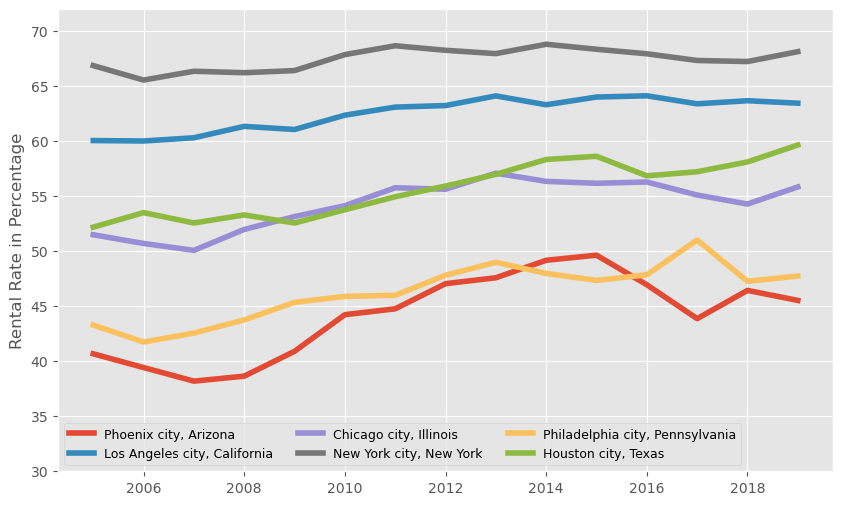

In [93]:
with plt.style.context('ggplot'):
    fig,ax =plt.subplots(figsize=(10,6))
    for city in all_rental_data['City'].unique():
        print(city)
        this_city=all_rental_data['City']==city
        city_df=all_rental_data.loc[this_city]
        ax.plot(city_df['Year'],city_df['Rental Rate'],label=city, linewidth=4)
    ax.legend(loc=0, ncol=3, fontsize=9)
    ax.set_ylim(30,72)
    ax.set_ylabel("Rental Rate in Percentage")
    plt.show()

In [94]:
all_rental_data["City"] == "Philadelphia city, Pennsylvania"

13     False
75     False
218    False
349    False
393     True
       ...  
94     False
284    False
439    False
487     True
538    False
Name: City, Length: 90, dtype: bool

In [95]:
philly = all_rental_data.loc[
    all_rental_data["City"] == "Philadelphia city, Pennsylvania"
]

philly

,City,Total,Rentals,Rental Rate,Year
393,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005
400,"Philadelphia city, Pennsylvania",554048,231323,41.751437,2006
408,"Philadelphia city, Pennsylvania",562384,239363,42.562199,2007
415,"Philadelphia city, Pennsylvania",578263,253084,43.766245,2008
419,"Philadelphia city, Pennsylvania",569835,258459,45.356814,2009
427,"Philadelphia city, Pennsylvania",575413,264129,45.902508,2010
434,"Philadelphia city, Pennsylvania",576429,265126,45.994563,2011
437,"Philadelphia city, Pennsylvania",579874,277323,47.824700,2012
449,"Philadelphia city, Pennsylvania",582528,285430,48.998503,2013
454,"Philadelphia city, Pennsylvania",577862,277301,47.987409,2014


In [96]:
philly.loc[393]

City           Philadelphia city, Pennsylvania
Total                                   565433
Rentals                                 244792
Rental Rate                          43.292839
Year                                      2005
Name: 393, dtype: object

In [97]:
philly.iloc[2]

City           Philadelphia city, Pennsylvania
Total                                   562384
Rentals                                 239363
Rental Rate                          42.562199
Year                                      2007
Name: 408, dtype: object

In [98]:
all_rental_data.loc[393]

City           Philadelphia city, Pennsylvania
Total                                   565433
Rentals                                 244792
Rental Rate                          43.292839
Year                                      2005
Name: 393, dtype: object

In [99]:
philly.reset_index(drop=True)

,City,Total,Rentals,Rental Rate,Year
0,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005
1,"Philadelphia city, Pennsylvania",554048,231323,41.751437,2006
2,"Philadelphia city, Pennsylvania",562384,239363,42.562199,2007
3,"Philadelphia city, Pennsylvania",578263,253084,43.766245,2008
4,"Philadelphia city, Pennsylvania",569835,258459,45.356814,2009
5,"Philadelphia city, Pennsylvania",575413,264129,45.902508,2010
6,"Philadelphia city, Pennsylvania",576429,265126,45.994563,2011
7,"Philadelphia city, Pennsylvania",579874,277323,47.824700,2012
8,"Philadelphia city, Pennsylvania",582528,285430,48.998503,2013
9,"Philadelphia city, Pennsylvania",577862,277301,47.987409,2014


In [100]:
philly_2005 = philly.loc[philly['Year']==2005]


philly_2005

,City,Total,Rentals,Rental Rate,Year
393,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005


In [101]:
philly_2005["Rental Rate"]

393    43.292839
Name: Rental Rate, dtype: float64

In [102]:
philly_2005['Rental Rate'].iloc[0]

43.292839293072745

In [103]:
len(philly_2005["Rental Rate"])

1

In [104]:
philly_2019 = philly.loc[philly['Year']==2019].squeeze()
value_2019=philly_2019['Rental Rate']


In [105]:
print(value_2019)

47.74505451933398


In [112]:
philly_2005= philly.loc[philly['Year']==2005].squeeze()
value_2005 = philly_2005["Rental Rate"]
value_2005

43.292839293072745

In [113]:
percent_change= (value_2019-value_2005)/value_2005*100

In [114]:
print(f"change in rental rate in Philadelphia from 2005 to 2019= {percent_change}")

change in rental rate in Philadelphia from 2005 to 2019= 10.283952956103837
